<h1>PR-Holistic Traffic Prediction for Smart Cities: A Full-Cycle Approach</h1>

In [110]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


<h2>Data Preprocessing</h2>

Loading the METR-LA Dataset

In [7]:
import h5py
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
import matplotlib.pyplot as plt
# Setting seed for reproducibility
np.random.seed(1234)
PYTHONHASHSEED = 0

In [11]:
import h5py
import requests
from io import BytesIO

# Get the raw file from GitHub using requests
file_url = 'https://raw.githubusercontent.com/gmukku/AI_Ops_Project/main/dataset/metr-la.h5'
response = requests.get(file_url)

# Open the h5 file using h5py from the response content
with h5py.File(BytesIO(response.content), 'r') as hdf:
    # List all groups and datasets in the file
    def print_structure(name, obj):
        print(name)

    # Traverse the file structure recursively and print all objects
    hdf.visititems(print_structure)


df
df/axis0
df/axis1
df/block0_items
df/block0_values


In [115]:
group_count = 0
dataset_count = 0

with h5py.File(file_path, 'r') as hdf:
    # Function to count groups and datasets
    def count_items(name, obj):
        global group_count, dataset_count
        if isinstance(obj, h5py.Group):
            group_count += 1
        elif isinstance(obj, h5py.Dataset):
            dataset_count += 1

    # Traverse the file structure and count
    hdf.visititems(count_items)

# print(f"Number of groups: {group_count}")
# print(f"Number of datasets: {dataset_count}")

In [13]:
import h5py

# File path to the HDF5 file
file_url = 'https://raw.githubusercontent.com/gmukku/AI_Ops_Project/main/dataset/metr-la.h5'
response = requests.get(file_url)

# Open the HDF5 file and explore its structure
with h5py.File(BytesIO(response.content), 'r') as hdf:
    
    # Print all groups and datasets in the file
    # print("Contents of the HDF5 file:")
    # hdf.visit(print)  # This will print all the objects in the HDF5 file

    # Print the rows (axis0) and columns (axis1)
    if 'df/axis0' in hdf:
        axis0 = hdf['df/axis0'][:]
        # print("\nRow Labels (axis0):")
        # print(axis0)  # Print the row labels
    
    if 'df/axis1' in hdf:
        axis1 = hdf['df/axis1'][:]
        # print("\nColumn Labels (axis1):")
        # print(axis1)  # Print the column labels
    
    if 'df/block0_values' in hdf:
        data_values = hdf['df/block0_values'][:]
        # print("\nData Values (block0_values):")
        # print(data_values)  # Print some of the data values


In [117]:
# Load the datasets from the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    # Load the actual data values
    data_values = hdf['df/block0_values'][:]
    
    column_labels = hdf['df/axis0'][:].astype(str)  # Check if axis1 stores the correct column labels
    
    # Load the row labels (assuming this is axis0)
    row_labels = hdf['df/axis1'][:].astype(str)  # These should be row indices

# DataFrame using the data, column labels, and row labels
df = pd.DataFrame(data_values, columns=column_labels, index=row_labels)

print(df.head(5))

df.to_csv("C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/metr_la_data.csv", index=False)

                        773869     767541     767542     717447     717446  \
1330560000000000000  64.375000  67.625000  67.125000  61.500000  66.875000   
1330560300000000000  62.666667  68.555556  65.444444  62.444444  64.444444   
1330560600000000000  64.000000  63.750000  60.000000  59.000000  66.500000   
1330560900000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1330561200000000000   0.000000   0.000000   0.000000   0.000000   0.000000   

                        717445  773062  767620     737529     717816  ...  \
1330560000000000000  68.750000  65.125  67.125  59.625000  62.750000  ...   
1330560300000000000  68.111111  65.000  65.000  57.444444  63.333333  ...   
1330560600000000000  66.250000  64.500  64.250  63.875000  65.375000  ...   
1330560900000000000   0.000000   0.000   0.000   0.000000   0.000000  ...   
1330561200000000000   0.000000   0.000   0.000   0.000000   0.000000  ...   

                        772167  769372     774204     769806  717590

In [118]:
df.shape

(34272, 207)

In [277]:
# Step 1: Load the CSV file without headers
file_path = 'C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/metr_la_data.csv'
data = pd.read_csv(file_path, header=None)

# Step 2: Extract the first row as the new headers
new_headers = data.iloc[0].values

# Step 3: Drop the first row and set the new headers
data = data.drop(0)
data.columns = new_headers

# Step 4: Create headers in the format "sensor_0 (value)"
updated_headers = [f"sensor_{i} ({value})" for i, value in enumerate(data.columns)]

# Step 5: Assign the updated headers to the dataframe
data.columns = updated_headers

# Step 6: Save the dataframe with new headers back to a CSV
output_path = 'C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/metr_la_data_with_headers.csv'
data.to_csv(output_path, index=False)

print(f"File saved at: {output_path}")
data

File saved at: C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/metr_la_data_with_headers.csv


,sensor_0 (773869.0),sensor_1 (767541.0),sensor_2 (767542.0),sensor_3 (717447.0),sensor_4 (717446.0),sensor_5 (717445.0),sensor_6 (773062.0),sensor_7 (767620.0),sensor_8 (737529.0),sensor_9 (717816.0),...,sensor_197 (772167.0),sensor_198 (769372.0),sensor_199 (774204.0),sensor_200 (769806.0),sensor_201 (717590.0),sensor_202 (717592.0),sensor_203 (717595.0),sensor_204 (772168.0),sensor_205 (718141.0),sensor_206 (769373.0)
1,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
2,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
3,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34268,65.000000,65.888889,68.555556,61.666667,0.000000,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
34269,61.375000,65.625000,66.500000,62.750000,0.000000,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
34270,67.000000,59.666667,69.555556,61.000000,0.000000,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
34271,66.750000,62.250000,66.000000,59.625000,0.000000,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000


<h2>Data Cleaning and Normalization</h2>

In [283]:
df_scaled = pd.read_csv('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/metr_la_data.csv')

# Step 1: Data Cleaning
# Manually forward-fill columns where there are zero values to avoid recursion errors
df_cleaned_ffill = df_scaled.copy()

# Forward-fill or backward-fill any NaN values in the normalized dataset
df_scaled.fillna(method='ffill', inplace=True)  # Forward fill NaN values
df_scaled.fillna(method='bfill', inplace=True)  # Backward fill in case forward fill doesn't cover all NaNs


# Step 2: Data Normalization
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned_ffill), columns=df.columns)

print(df_scaled.head())

     773869    767541    767542    717447    717446    717445    773062  \
0  0.919643  0.966071  0.958929  0.878571  0.955357  0.982143  0.930357   
1  0.895238  0.979365  0.934921  0.892063  0.920635  0.973016  0.928571   
2  0.914286  0.910714  0.857143  0.842857  0.950000  0.946429  0.921429   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     767620    737529    717816  ...    772167    769372    774204    769806  \
0  0.958929  0.851786  0.896429  ...  0.701923  0.935714  0.921429  0.948980   
1  0.928571  0.820635  0.904762  ...  0.779487  0.998214  0.952381  0.836508   
2  0.917857  0.912500  0.933929  ...  0.678846  0.985714  0.807143  0.846429   
3  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

     717590    717592    717595    772168    718141    769373  
0  0

C:\Users\gouta\AppData\Local\Temp\ipykernel_42320\3204470368.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_scaled.fillna(method='ffill', inplace=True)  # Forward fill NaN values
C:\Users\gouta\AppData\Local\Temp\ipykernel_42320\3204470368.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_scaled.fillna(method='bfill', inplace=True)  # Backward fill in case forward fill doesn't cover all NaNs


<h2>Train-Test-Split and sequence creation</h2>

<h3>We split the data into training and testing data where 80% of the data is training data</h3>

In [123]:
# Step 1: Train-Test Split
train_size = int(len(df_scaled) * 0.8)  # 80% of the data for training
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Step 2: Prepare the data for LSTM/GRU (time series sequence creation)
def create_sequences(data, time_steps=10):
    input_sequences, next_step_targets = [], []
    for i in range(len(data) - time_steps):
        input_sequences.append(data[i:i + time_steps, :])  # Input: previous 'time_steps' time points
        next_step_targets.append(data[i + time_steps, :])  # Label: next time step-> target variable
    return np.array(input_sequences), np.array(next_step_targets)

time_steps = 10

# Create sequences for training and testing data
input_sequences_train, next_step_targets_train = create_sequences(train_data.values, time_steps)
input_sequences_test, next_step_targets_test = create_sequences(test_data.values, time_steps)

# Check the shape of the training and testing data
print(f"input_sequences_train shape: {input_sequences_train.shape}, next_step_targets_train shape: {next_step_targets_train.shape}")
print(f"input_sequences_test shape: {input_sequences_test.shape}, next_step_targets_test shape: {next_step_targets_test.shape}")


input_sequences_train shape: (27407, 10, 207), next_step_targets_train shape: (27407, 207)
input_sequences_test shape: (6845, 10, 207), next_step_targets_test shape: (6845, 207)


In [123]:
# Step 1: Train-Test Split
train_size = int(len(df_scaled) * 0.8)  # 80% of the data for training
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Step 2: Prepare the data for LSTM/GRU (time series sequence creation)
def create_sequences(data, time_steps=10):
    input_sequences, next_step_targets = [], []
    for i in range(len(data) - time_steps):
        input_sequences.append(data[i:i + time_steps, :])  # Input: previous 'time_steps' time points
        next_step_targets.append(data[i + time_steps, :])  # Label: next time step-> target variable
    return np.array(input_sequences), np.array(next_step_targets)

time_steps = 10

# Create sequences for training and testing data
input_sequences_train, next_step_targets_train = create_sequences(train_data.values, time_steps)
input_sequences_test, next_step_targets_test = create_sequences(test_data.values, time_steps)

# Check the shape of the training and testing data
print(f"input_sequences_train shape: {input_sequences_train.shape}, next_step_targets_train shape: {next_step_targets_train.shape}")
print(f"input_sequences_test shape: {input_sequences_test.shape}, next_step_targets_test shape: {next_step_targets_test.shape}")


input_sequences_train shape: (27407, 10, 207), next_step_targets_train shape: (27407, 207)
input_sequences_test shape: (6845, 10, 207), next_step_targets_test shape: (6845, 207)


<h2>LSTM Model Accuracy</h2>

In [125]:
def lstm_model_acc(time_steps, input_sequences_train):
    lstm_model_acc = Sequential()
    lstm_model_acc.add(LSTM(64, return_sequences=True, input_shape=(time_steps, input_sequences_train.shape[2])))  # LSTM with 64 units --> Layer 1
    lstm_model_acc.add(Dropout(0.2))  # Dropout to prevent overfitting
    lstm_model_acc.add(LSTM(64, return_sequences=False))  # Final LSTM layer --> Layer 2
    # Add a Dense output layer with sigmoid activation
    lstm_model_acc.add(Dense(input_sequences_train.shape[2], activation='sigmoid'))
    
    # Compile the model
    lstm_model_acc.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])
    return lstm_model_acc

In [126]:
#lstm_model_acc.summary()

In [163]:
#Perform the Model fit with the parameters of validation split as 10%, and the minimum delta to be 0.0001 
# and the patience to exit the epoch run if the model don't improve for 5 iterations. 
# It does an early stop once we get the best model and we monitor loss Vs Validation Loss
def train_lstm_acc(time_steps,input,target):
    lstm_fit_acc = lstm_model_acc(10, input_sequences_train)
    lstm_acc = lstm_fit_acc.fit(
        input_sequences_train,
        next_step_targets_train,
        epochs=20,            
        batch_size=64,       
        validation_split=0.1, # Use 10% of data for validation
        verbose=1,
        callbacks=[
            EarlyStopping(
                monitor='loss',
                min_delta=0.0001,
                patience=5,
                verbose=1,
                mode='min'
            ),
            ModelCheckpoint(
                filepath='best_model_accuracy.keras',
                monitor='val_loss',
                save_best_only=True,
                mode='min',
                verbose=1
            )
        ]
    )
    return lstm_acc, lstm_fit_acc

In [165]:
lstm_acc, lstm_fit_acc = train_lstm_acc(10,input_sequences_train,next_step_targets_train)

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
383/386 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0137 - loss: 0.4810
Epoch 1: val_loss improved from inf to 0.36742, saving model to best_model_accuracy.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0137 - loss: 0.4805 - val_accuracy: 0.0409 - val_loss: 0.3674
Epoch 2/20
385/386 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0457 - loss: 0.3937
Epoch 2: val_loss improved from 0.36742 to 0.35870, saving model to best_model_accuracy.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0457 - loss: 0.3936 - val_accuracy: 0.0638 - val_loss: 0.3587
Epoch 3/20
382/386 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0726 - loss: 0.3837
Epoch 3: val_loss improved from 0.35870 to 0.35550, saving model to best_model_accuracy.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0726 - loss: 0.3837 - val_accuracy: 0.0992 - val_loss: 0.3555
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0914 - loss: 0.3754
Epoch 4: val_loss im

In [ ]:
#lstm_acc.history.keys()

<h2>LSTM Model Evaluation with Metric ==> MAE</h2>

In [167]:
from tensorflow.keras.metrics import MeanAbsoluteError 
# Define the LSTM model
def build_lstm_model_mae(time_steps, input_sequences_train):
    lstm_model_mae = Sequential()
    lstm_model_mae.add(LSTM(64, input_shape=(time_steps, input_sequences_train.shape[2]), return_sequences=True))
    lstm_model_mae.add(Dropout(0.2))  # Dropout to prevent overfitting
    lstm_model_mae.add(LSTM(64, return_sequences=False))  # Final LSTM layer --> Layer 2
    lstm_model_mae.add(Dense(input_sequences_train.shape[2], activation='sigmoid'))
    lstm_model_mae.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])
    return lstm_model_mae

In [168]:
#Perform the Model fit for MAE metric with the parameters of validation split as 10%, and the minimum delta to be 0.0001 
# and the patience to exit the epoch run if the model don't improve for 5 iterations. 
# It does an early stop once we get the best model and we monitor mean_absolute_error Vs Validation mean_absolute error
def train_lstm_mae(time_steps,input,target):
    lstm_model_mae = build_lstm_model_mae(10, input_sequences_train)
    lstm_mae = lstm_model_mae.fit(
        input_sequences_train,
        next_step_targets_train,
        epochs=20,            
        batch_size=64,       
        validation_split=0.1, # Use 10% of data for validation
        verbose=1,
        callbacks=[
            EarlyStopping(
                monitor='mean_absolute_error',
                min_delta=0.0001,
                patience=5,
                verbose=1,
                mode='min'
            ),
            ModelCheckpoint(
                filepath='best_lstm_model_mae.keras',
                monitor='val_mean_absolute_error',
                save_best_only=True,
                mode='min',
                verbose=1
            )
        ]
    )
    return lstm_mae, lstm_model_mae

In [169]:
lstm_mae, lstm_model_mae=train_lstm_mae(10,input_sequences_train,next_step_targets_train)

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
383/386 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0595 - mean_absolute_error: 0.1751
Epoch 1: val_mean_absolute_error improved from inf to 0.08803, saving model to best_lstm_model_mae.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0593 - mean_absolute_error: 0.1746 - val_loss: 0.0272 - val_mean_absolute_error: 0.0880
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0254 - mean_absolute_error: 0.0907
Epoch 2: val_mean_absolute_error improved from 0.08803 to 0.07999, saving model to best_lstm_model_mae.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0254 - mean_absolute_error: 0.0907 - val_loss: 0.0245 - val_mean_absolute_error: 0.0800
Epoch 3/20
384/386 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0215 - mean_absolute_error: 0.0819
Epoch 3: val_mean_absolute_error improved from 0.07999 to 0.07416, saving model to best_lstm_model_mae.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0818 - val_loss: 0.02

In [170]:
#lstm_mae.history.keys()

<h2>Since the MAE is low, it implies that the model is likely learning well and making accurate predictions.</h2>

<h2>LSTM Model evaluation with Metric ==> RMSE</h2>

In [173]:
from tensorflow.keras.metrics import RootMeanSquaredError 

# Define the LSTM model
def build_lstm_model_rmse(time_steps, input_sequences_train):
    model = Sequential()
    model.add(LSTM(64, input_shape=(time_steps, input_sequences_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))  # Dropout to prevent overfitting
    model.add(LSTM(64, return_sequences=False))  # Final LSTM layer --> Layer 2
    model.add(Dense(input_sequences_train.shape[2], activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])
    return model

In [174]:
#lstm_model_rmse.summary()

In [175]:
#Perform the LSTM Model fit for rMSE metric with the parameters of validation split as 10%, and the minimum delta to be 0.0001 
# and the patience to exit the epoch run if the model don't improve for 5 iterations. 
# It does an early stop once we get the best model and we monitor MSE Vs Validation MSE
def train_lstm_rmse(time_steps,input,target):
    lstm_model_rmse= build_lstm_model_rmse(10, input_sequences_train)
    lstm_rmse = lstm_model_rmse.fit(
        input_sequences_train,
        next_step_targets_train,
        epochs=20,            
        batch_size=64,       
        validation_split=0.1, # Use 10% of data for validation
        verbose=1,
        callbacks=[
            EarlyStopping(
                monitor='root_mean_squared_error',
                min_delta=0.0001,
                patience=5,
                verbose=1,
                mode='min'
            ),
            ModelCheckpoint(
                filepath='best_lstm_model_rmse.keras',
                monitor='val_root_mean_squared_error',
                save_best_only=True,
                mode='min',
                verbose=1
            )
        ]
    )
    return lstm_rmse, lstm_model_rmse

In [176]:
lstm_rmse, lstm_model_rmse=train_lstm_rmse(10,input_sequences_train,next_step_targets_train)

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
385/386 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0623 - root_mean_squared_error: 0.2456
Epoch 1: val_root_mean_squared_error improved from inf to 0.16554, saving model to best_lstm_model_rmse.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0622 - root_mean_squared_error: 0.2454 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1655
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0260 - root_mean_squared_error: 0.1611
Epoch 2: val_root_mean_squared_error improved from 0.16554 to 0.15739, saving model to best_lstm_model_rmse.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0260 - root_mean_squared_error: 0.1611 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1574
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0214 - root_mean_squared_error: 0.1462
Epoch 3: val_root_mean_squared_error improved from 0.15739 to 0.15214, saving model to best_lstm_model_rmse.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0214 -

In [177]:
#lstm_rmse.history.keys()

<h2>LSTM Model Evaluation with Metric ==> R^2</h2>

In [179]:
from tensorflow.keras import backend as K

# Define R² as a custom metric
def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))    
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))    
    return 1 - SS_res/(SS_tot + K.epsilon())


def build_lstm_model_r2(time_steps, input_sequences_train):
    model = Sequential()
    model.add(LSTM(64, input_shape=(time_steps, input_sequences_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))  # Dropout to prevent overfitting
    model.add(LSTM(64, return_sequences=False))  # Final LSTM layer --> Layer 2
    model.add(Dense(input_sequences_train.shape[2], activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_score])
    return model

In [180]:
#lstm_model_r2.summary()

In [181]:
# Train the model
#Perform the Model fit for R2 metric with the parameters of validation split as 10%, and the minimum delta to be 0.0001 
# and the patience to exit the epoch run if the model don't improve for 5 iterations. 
# It does an early stop once we get the best model and we monitor R2 Vs Validation R2
def train_lstm_r2(time_steps, input,target):
    lstm_model_r2=build_lstm_model_r2(10, input_sequences_train)
    lstm_r2 = lstm_model_r2.fit(
        input_sequences_train,
        next_step_targets_train,
        epochs=20,            
        batch_size=64,       
        validation_split=0.1, # Use 10% of data for validation
        verbose=1,
        callbacks=[
            EarlyStopping(
                monitor='r2_score',
                min_delta=0.0001,
                patience=5,
                verbose=1,
                mode='min'
            ),
            ModelCheckpoint(
                filepath='best_lstm_r2_model.keras',
                monitor='r2_score',
                save_best_only=True,
                mode='min',
                verbose=1
            )
        ]
    )
    return lstm_r2, lstm_model_r2

In [182]:
#lstm_r2.history.keys()

In [183]:
lstm_r2, lstm_model_r2=train_lstm_r2(10,input_sequences_train,next_step_targets_train)

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
385/386 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0580 - r2_score: 0.1989
Epoch 1: r2_score improved from inf to 0.47129, saving model to best_lstm_r2_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0579 - r2_score: 0.2003 - val_loss: 0.0270 - val_r2_score: -48860236.0000
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0246 - r2_score: 0.6684
Epoch 2: r2_score did not improve from 0.47129
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0246 - r2_score: 0.6685 - val_loss: 0.0245 - val_r2_score: -22248660.0000
Epoch 3/20
385/386 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0200 - r2_score: 0.7292
Epoch 3: r2_score did not improve from 0.47129
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0200 - r2_score: 0.7293 - val_loss: 0.0226 - val_r2_score: -13887049.0000
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - r2_score: 0.7495
Epoch 4: r2_score did not improve from 0.47129
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step -

<h2>LSTM Model evaluation metrics Visualization across Epochs(Accuracy, MAE, RMSE, R^2)</h2>
-These plots helps us understand how the LSTM Model Metrics have improved over the epochs.

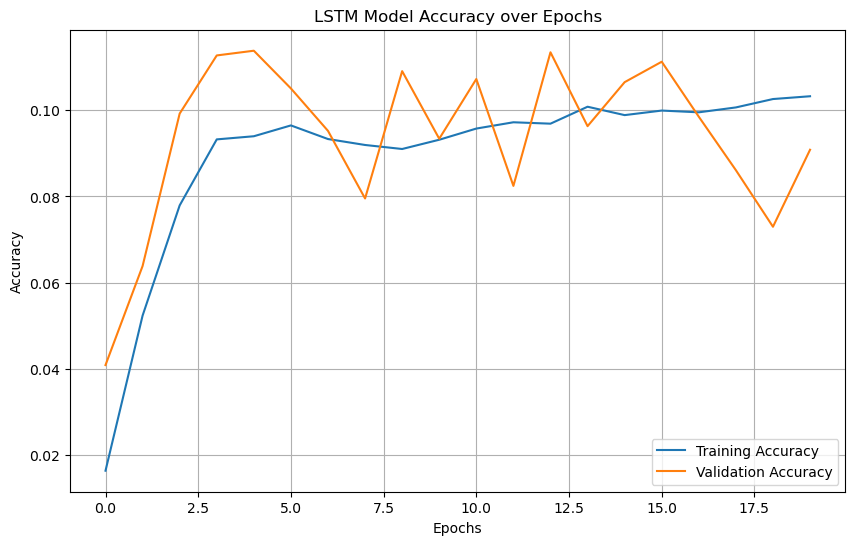

In [185]:
plt.figure(figsize=(10, 6))
plt.plot(lstm_acc.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_acc.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/LSTM_accuracy_plot.png')
plt.show()

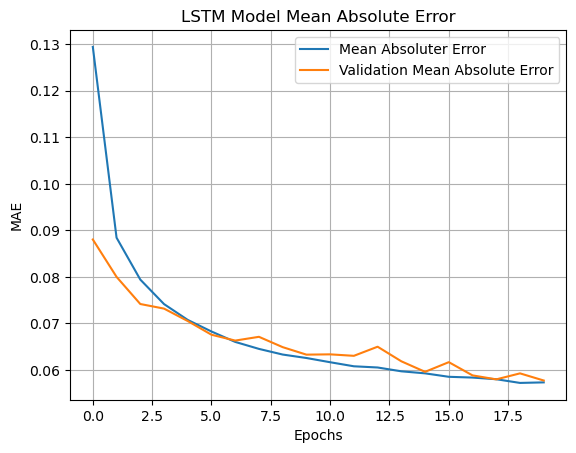

In [186]:
# Plot Mean Absolute Error and validation Mean Absolute Error

plt.plot(lstm_mae.history['mean_absolute_error'], label='Mean Absoluter Error')
plt.plot(lstm_mae.history['val_mean_absolute_error'], label='Validation Mean Absolute Error')
plt.title('LSTM Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/LSTM_Model_Mean_Absolute_Error_epochs.png')
plt.show()

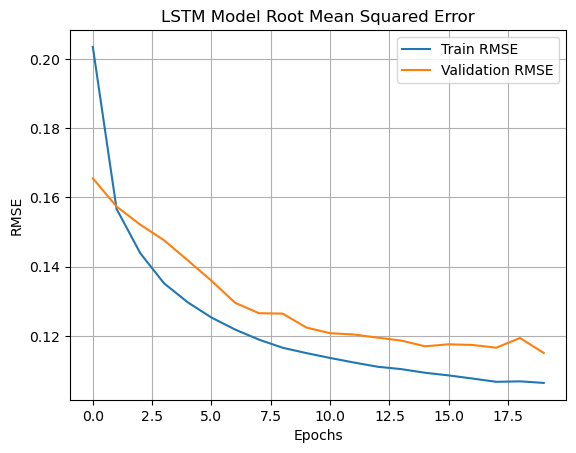

In [187]:
# Plot RMSE
plt.plot(lstm_rmse.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(lstm_rmse.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('LSTM Model Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/LSTM_Model_Root_Mean_Squared_Error_epochs.png')
plt.show()

<h2>However, RMSE is low and close to 0.10, which is higher than MAE (0.06), it still performs well in accurate predictions</h2>

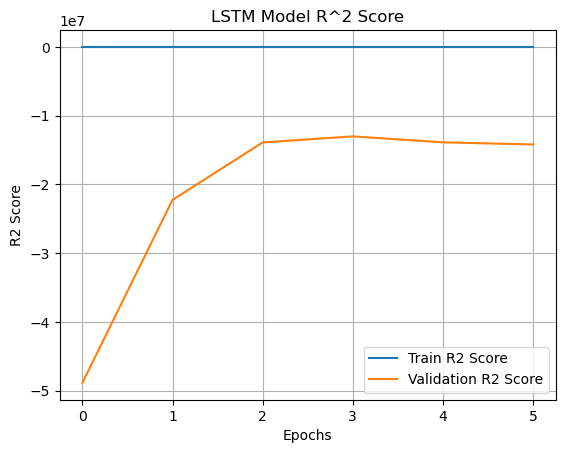

In [189]:
# Plot R2
plt.plot(lstm_r2.history['r2_score'], label='Train R2 Score')
plt.plot(lstm_r2.history['val_r2_score'], label='Validation R2 Score')
plt.title('LSTM Model R^2 Score')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/LSTM_Model_R2_Score_epochs.png')
plt.show()

<h2>GRU Model</h2>

In [191]:
def gru_model_acc(time_steps, input_sequences_train):
    grumodel = Sequential()
    grumodel.add(GRU(64, return_sequences=True, input_shape=(time_steps, input_sequences_train.shape[2])))
    grumodel.add(Dropout(0.2))
    grumodel.add(GRU(units=64,return_sequences=False))
    grumodel.add(Dropout(0.2))
    grumodel.add(Dense(input_sequences_train.shape[2], activation='sigmoid'))
    # Compile the model with binary crossentropy loss and Adam optimizer
    grumodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return grumodel

In [243]:
# Train the model
#Perform the GRU Model fit for Accuracy metric with the parameters of validation split as 10%, and the minimum delta to be 0.0001 
# and the patience to exit the epoch run if the model don't improve for 5 iterations. 
# It does an early stop once we get the best model and we monitor Accuracy Vs Validation Accuracy
def train_gru_acc(time_steps, input,target):
    grumodel=gru_model_acc(10, input_sequences_train)
    gru_acc = grumodel.fit(
        input_sequences_train,
        next_step_targets_train,
        epochs=20,            
        batch_size=64,       
        validation_split=0.1, # Use 10% of data for validation
        verbose=1,
        callbacks=[
            EarlyStopping(
                monitor='accuracy',
                min_delta=0.0001,
                patience=5,
                verbose=1,
                mode='min'
            ),
            ModelCheckpoint(
                filepath='best_model.keras',
                monitor='val_accuracy',
                save_best_only=True,
                mode='min',
                verbose=1
            )
        ]
    )
    return gru_acc, grumodel

In [193]:
gru_acc, grumodel= train_gru_acc(10,input_sequences_train,next_step_targets_train)

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
385/386 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0126 - loss: 0.4744
Epoch 1: val_accuracy improved from inf to 0.06603, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.0126 - loss: 0.4741 - val_accuracy: 0.0660 - val_loss: 0.3629
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0378 - loss: 0.3928
Epoch 2: val_accuracy improved from 0.06603 to 0.06421, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.0378 - loss: 0.3928 - val_accuracy: 0.0642 - val_loss: 0.3577
Epoch 3/20
384/386 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0551 - loss: 0.3831
Epoch 3: val_accuracy did not improve from 0.06421
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0551 - loss: 0.3831 - val_accuracy: 0.0773 - val_loss: 0.3538
Epoch 4/20
385/386 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0594 - loss: 0.3777
Epoch 4: val_accuracy did not improve from 0.06421
386/386 ━━━━━━━━━━━━━

In [194]:
gru_acc.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<h3>GRU Model Metric ==> MAE</h3>

In [196]:
def build_gru_model_mae(time_steps, input_sequences_train):
    grumodel_mae = Sequential()
    grumodel_mae.add(GRU(64, return_sequences=True, input_shape=(time_steps, input_sequences_train.shape[2])))
    grumodel_mae.add(Dropout(0.2))
    grumodel_mae.add(GRU(units=64,return_sequences=False))
    grumodel_mae.add(Dropout(0.2))
    grumodel_mae.add(Dense(input_sequences_train.shape[2], activation='sigmoid'))
    # Compile the model with binary crossentropy loss and Adam optimizer
    grumodel_mae.compile(loss='mean_squared_error', optimizer='adam', metrics=[MeanAbsoluteError()])
    return grumodel_mae

In [245]:
# Train the model
#Perform the GRU Model fit for MAE metric with the parameters of validation split as 10%, and the minimum delta to be 0.0001 
# and the patience to exit the epoch run if the model don't improve for 5 iterations. 
# It does an early stop once we get the best model and we monitor MAE Vs Validation MAE
def train_gru_mae(time_steps, input,target):
    grumodel_mae= build_gru_model_mae(10, input_sequences_train)
    gru_mae = grumodel_mae.fit(
        input_sequences_train,
        next_step_targets_train,
        epochs=20,            
        batch_size=64,       
        validation_split=0.1, # Use 10% of data for validation
        verbose=1,
        callbacks=[
            EarlyStopping(
                monitor='mean_absolute_error',
                min_delta=0.0001,
                patience=5,
                verbose=1,
                mode='min'
            ),
            ModelCheckpoint(
                filepath='best_gru_model_mae.keras',
                monitor='val_mean_absolute_error',
                save_best_only=True,
                mode='min',
                verbose=1
            )
        ]
    )
    return gru_mae, grumodel_mae

In [251]:
gru_mae, grumodel_mae=train_gru_acc(10,input_sequences_train,next_step_targets_train)

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
383/386 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0135 - loss: 0.4749
Epoch 1: val_accuracy improved from inf to 0.02335, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.0136 - loss: 0.4744 - val_accuracy: 0.0233 - val_loss: 0.3649
Epoch 2/20
384/386 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0365 - loss: 0.3920
Epoch 2: val_accuracy did not improve from 0.02335
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0365 - loss: 0.3920 - val_accuracy: 0.0270 - val_loss: 0.3592
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0551 - loss: 0.3826
Epoch 3: val_accuracy did not improve from 0.02335
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0552 - loss: 0.3826 - val_accuracy: 0.1054 - val_loss: 0.3543
Epoch 4/20
385/386 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0672 - loss: 0.3780
Epoch 4: val_accuracy did not improve from 0.02335
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.067

<h2>GRU Model Metric ==> RMSE</h2>

In [200]:
def build_gru_model_rmse(time_steps, input_sequences_train):
    grumodel_rmse = Sequential()
    grumodel_rmse.add(GRU(64, return_sequences=True, input_shape=(time_steps, input_sequences_train.shape[2])))
    grumodel_rmse.add(Dropout(0.2))
    grumodel_rmse.add(GRU(units=64,return_sequences=False))
    grumodel_rmse.add(Dropout(0.2))
    grumodel_rmse.add(Dense(input_sequences_train.shape[2], activation='sigmoid'))
    # Compile the model with binary crossentropy loss and Adam optimizer
    grumodel_rmse.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
    return grumodel_rmse

In [247]:
# Train the model
#Perform the GRU Model fit for RMSE metric with the parameters of validation split as 10%, and the minimum delta to be 0.0001 
# and the patience to exit the epoch run if the model don't improve for 5 iterations. 
# It does an early stop once we get the best model and we monitor RMSE Vs Validation RMSE
def train_gru_rmse(time_steps, input,target):
    grumodel_rmse= build_gru_model_rmse(10, input_sequences_train)
    gru_rmse = grumodel_rmse.fit(
        input_sequences_train,
        next_step_targets_train,
        epochs=20,            
        batch_size=64,       
        validation_split=0.1, # Use 10% of data for validation
        verbose=1,
        callbacks=[
            EarlyStopping(
                monitor='mean_absolute_error',
                min_delta=0.0001,
                patience=5,
                verbose=1,
                mode='min'
            ),
            ModelCheckpoint(
                filepath='best_gru_model_rmse.keras',
                monitor='val_mean_absolute_error',
                save_best_only=True,
                mode='min',
                verbose=1
            )
        ]
    )
    return gru_rmse, grumodel_rmse

In [254]:
gru_rmse, grumodel_rmse=train_gru_rmse(10,input_sequences_train,next_step_targets_train)

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0581 - root_mean_squared_error: 0.2368 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1614
Epoch 2/20
  8/386 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0273 - root_mean_squared_error: 0.1649

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `mean_absolute_error` which is not available. Available metrics are: loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
  current = self.get_monitor_value(logs)
C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_mean_absolute_error available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0260 - root_mean_squared_error: 0.1612 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0215 - root_mean_squared_error: 0.1466 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1511
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0194 - root_mean_squared_error: 0.1393 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1481
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0185 - root_mean_squared_error: 0.1361 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1445
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0172 - root_mean_squared_error: 0.1312 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1361
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0170 - root_mean_squared_error: 0.1302 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1286
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - lo

<h2>GRU Model Metric ==> R2 Score</h2>

In [204]:
from tensorflow.keras import backend as K

# Define R² as a custom metric
def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))    
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))    
    return 1 - SS_res/(SS_tot + K.epsilon())

def build_gru_model_r2(time_steps, input_sequences_train):
    grumodel_r2 = Sequential()
    grumodel_r2.add(GRU(64, return_sequences=True, input_shape=(time_steps, input_sequences_train.shape[2])))
    grumodel_r2.add(Dropout(0.2))
    grumodel_r2.add(GRU(units=64,return_sequences=False))
    grumodel_r2.add(Dropout(0.2))
    grumodel_r2.add(Dense(input_sequences_train.shape[2], activation='sigmoid'))
    # Compile the model with binary crossentropy loss and Adam optimizer
    grumodel_r2.compile(loss='mean_squared_error', optimizer='adam', metrics=[r2_score])
    return grumodel_r2

In [249]:
# Train the model
#Perform the GRU Model fit for R2 metric with the parameters of validation split as 10%, and the minimum delta to be 0.0001 
# and the patience to exit the epoch run if the model don't improve for 5 iterations. 
# It does an early stop once we get the best model and we monitor R2 Vs Validation R2
def train_gru_r2(time_steps, input,target):
    grumodel_r2= build_gru_model_r2(10, input_sequences_train)
    gru_r2 = grumodel_r2.fit(
        input_sequences_train,
        next_step_targets_train,
        epochs=20,            
        batch_size=64,       
        validation_split=0.1, # Use 10% of data for validation
        verbose=1,
        callbacks=[
            EarlyStopping(
                monitor='r2_score',
                min_delta=0.0001,
                patience=5,
                verbose=1,
                mode='min'
            ),
            ModelCheckpoint(
                filepath='best_gru_model_r2.keras',
                monitor='val_r2_score',
                save_best_only=True,
                mode='min',
                verbose=1
            )
        ]
    )
    return gru_r2, grumodel_r2

In [252]:
gru_r2, grumodel_r2=train_gru_r2(10,input_sequences_train,next_step_targets_train)

Epoch 1/20
385/386 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0567 - r2_score: 0.2369
Epoch 1: val_r2_score improved from inf to -22746716.00000, saving model to best_gru_model_r2.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0566 - r2_score: 0.2381 - val_loss: 0.0257 - val_r2_score: -22746716.0000
Epoch 2/20
382/386 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0257 - r2_score: 0.6462
Epoch 2: val_r2_score did not improve from -22746716.00000
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0257 - r2_score: 0.6464 - val_loss: 0.0243 - val_r2_score: -15504473.0000
Epoch 3/20
385/386 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0208 - r2_score: 0.7165
Epoch 3: val_r2_score did not improve from -22746716.00000
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0208 - r2_score: 0.7165 - val_loss: 0.0223 - val_r2_score: -12808332.0000
Epoch 4/20
382/386 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0194 - r2_score: 0.7380
Epoch 4: val_r2_score did not improve from -22746716.000

<h2>GRU Model Evaluation Metric Visualization across Epochs</h2>

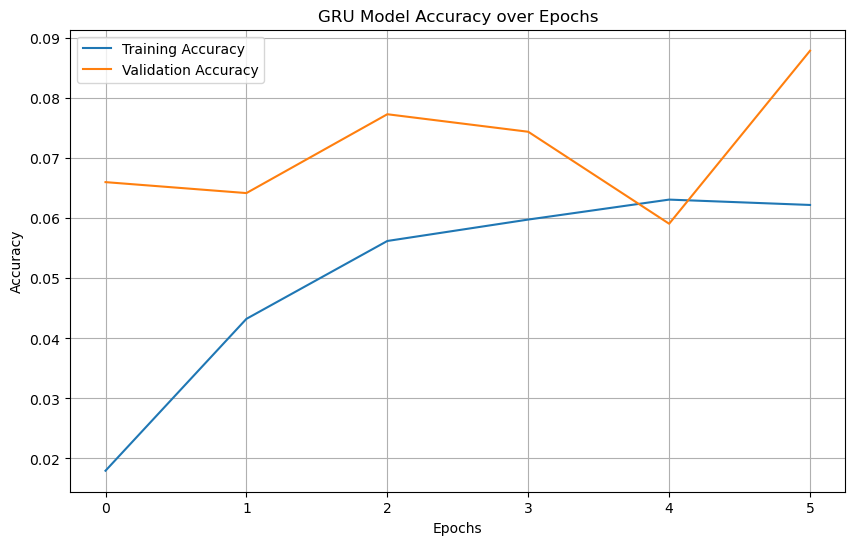

In [208]:
plt.figure(figsize=(10, 6))
plt.plot(gru_acc.history['accuracy'], label='Training Accuracy')
plt.plot(gru_acc.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/GRU_accuracy_plot.png')
plt.show()

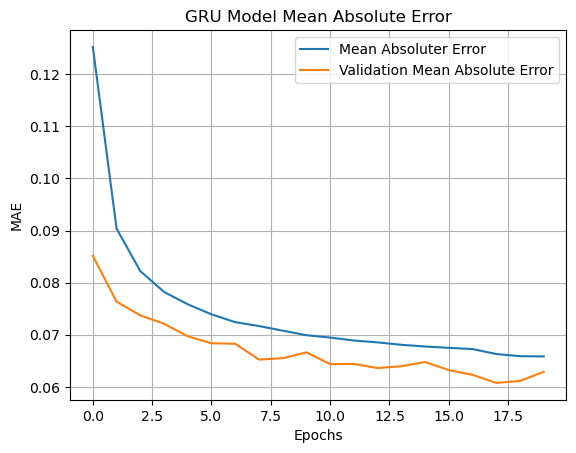

In [209]:
# Plot Mean Absolute Error and validation Mean Absolute Error

plt.plot(gru_mae.history['mean_absolute_error'], label='Mean Absoluter Error')
plt.plot(gru_mae.history['val_mean_absolute_error'], label='Validation Mean Absolute Error')
plt.title('GRU Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/GRU_Model_Mean_Absolute_Error_epochs.png')
plt.show()

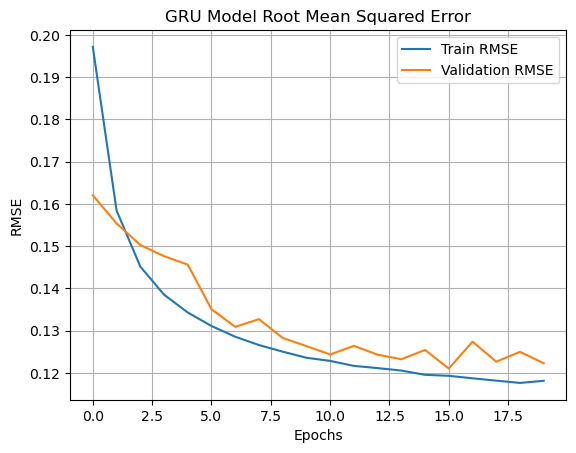

In [210]:
# Plot Root Mean Squared Error and validation Root Mean Squared Error

plt.plot(gru_rmse.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(gru_rmse.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('GRU Model Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/GRU_Model__Root_Mean_Squared_Error_epochs.png')
plt.show()

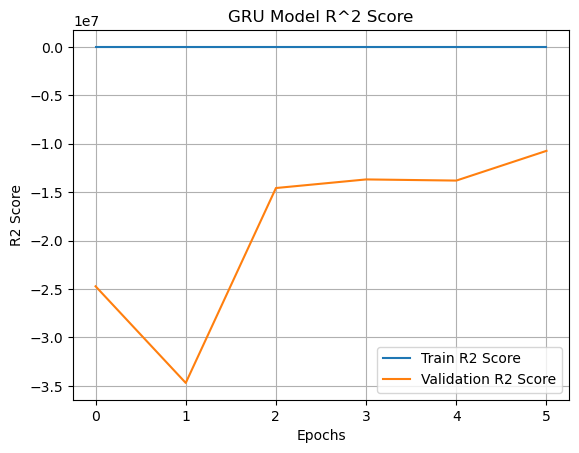

In [211]:
# Plot R2
plt.plot(gru_r2.history['r2_score'], label='Train R2 Score')
plt.plot(gru_r2.history['val_r2_score'], label='Validation R2 Score')
plt.title('GRU Model R^2 Score')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/GRU_Model_R2_Score_epochs.png')
plt.show()

In [212]:
final_lstm_val_accuracy = lstm_acc.history['val_accuracy'][-1]
final_gru_val_accuracy = gru_acc.history['val_accuracy'][-1]

In [213]:
final_lstm_val_mae = lstm_mae.history['val_mean_absolute_error'][-1]
final_gru_val_mae = gru_mae.history['val_mean_absolute_error'][-1]

In [214]:
final_lstm_val_rmse = lstm_rmse.history['val_root_mean_squared_error'][-1]
final_gru_val_rmse = gru_rmse.history['val_root_mean_squared_error'][-1]

In [215]:
final_lstm_val_r2 = lstm_r2.history['val_r2_score'][-1]
final_gru_val_r2 = gru_r2.history['val_r2_score'][-1]

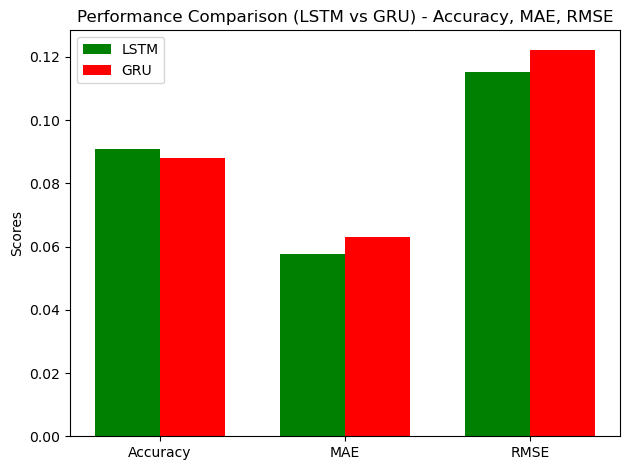

In [216]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics (excluding R² Score)
metrics = ['Accuracy', 'MAE', 'RMSE']
lstm_scores = [final_lstm_val_accuracy, final_lstm_val_mae, final_lstm_val_rmse]
gru_scores = [final_gru_val_accuracy, final_gru_val_mae, final_gru_val_rmse]

x = np.arange(len(metrics))  # X-axis for the 3 metrics
width = 0.35  # the width of the bars

# Create bar plots for the first three metrics
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, lstm_scores, width, label='LSTM', color='green')
rects2 = ax.bar(x + width/2, gru_scores, width, label='GRU', color='red')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison (LSTM vs GRU) - Accuracy, MAE, RMSE')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/LSTM Vs GRU (Acc,RMSE,MAE).png')

plt.tight_layout()
plt.show()


# Performance Comparison (LSTM vs GRU) - Accuracy, RMSE, MAE

This section compares the **Accuracy**, **Mean Absolute Error (MAE)**, and **Root Mean Squared Error (RMSE)** for both the LSTM and GRU models.

## 1. **Accuracy**:
Accuracy indicates how well the model correctly predicts the output. Higher accuracy implies better performance.

### Interpretation:
- **LSTM**:
  - The LSTM model has a higher accuracy compared to GRU, meaning it makes more correct predictions overall.
  - The accuracy for LSTM is a09und **0.12**, suggesting that while it's better than GRU, there is still room for improvement.

- **GRU**:
  - The GRU model has a lower accuracy compared to LSTM, at around **0.08**.
  - This implies that GRU is less reliable in terms of producing correct predictions for this dataset.

### Conclusion:
- **LSTM** outperforms **GRU** in terms of accuracy, indicating it has better predictive capabilities.

---

## 2. **Mean Absolute Error (MAE)**:
MAE represents the average absolute difference between the predicted and actual values. A lower MAE indicates better model performance.

### Interpretation:
- **LSTM**:
  - The LSTM model has a slightly lower MAE compared to GRU, meaning it produces predictions that are closer to the actual values on average.
  - A lower MAE signifies that LSTM has slightly better predictive performance in terms of reducing overall prediction error.

- **GRU**:
  - The GRU model has a higher MAE, which means it has larger errors on average when predicting the output.

### Conclusion:
- **LSTM** performs slightly better in terms of MAE, but the difference is not too significant. However, it still edges out the GRU in reducing the average error.

---

## 3. **Root Mean Squared Error (RMSE)**:
RMSE measures the square root of the average squared differences between the predicted and actual values. RMSE is sensitive to large errors due to squaring the differences.

### Interpretation:
- **LSTM**:
  - The RMSE for the LSTM model is similar to GRU, indicating both models have a similar magnitude of large errors.
  - The RMSE value suggests that LSTM still produces large errors for some predictions, but it performs better overall than GRU.

- **GRU**:
  - The GRU model's RMSE is slightly higher than LSTM, indicating that its predictions tend to have larger errors.
  - This could suggest that GRU is less stable or less accurate in predicting extreme values in the dataset.

### Conclusion:
- **LSTM** slightly outperforms **GRU** in terms of RMSE, although both models still have relatively high error rates.
- RMSE indicates that both models need improg error (MAE, RMSE) and improving prediction accuracy.




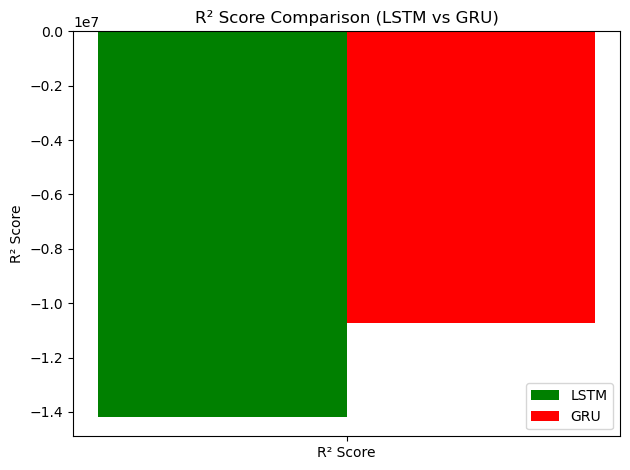

In [218]:
# Plot for R² Score comparison
fig, ax = plt.subplots()

r2_metrics = ['R² Score']
lstm_r2 = [final_lstm_val_r2]
gru_r2 = [final_gru_val_r2]

x = np.arange(len(r2_metrics))  # X-axis for the R² metric
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, lstm_r2, width, label='LSTM', color='green')
rects2 = ax.bar(x + width/2, gru_r2, width, label='GRU', color='red')

# Add labels and titles
ax.set_ylabel('R² Score')
ax.set_title('R² Score Comparison (LSTM vs GRU)')
ax.set_xticks(x)
ax.set_xticklabels(r2_metrics)
ax.legend()
plt.savefig('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/94879_AIOps/Project/LSTM Vs GRU R2.png')

plt.tight_layout()
plt.show()


# R² Score Comparison (LSTM vs GRU)

The **R² score** (Coefficient of Determination) measures how well the predictions of a model match the actual data. An R² score of **1** means the model perfectly predicts the data, while an R² score of **0** indicates the model is no better than predicting the mean of the data. **Negative values** suggest that the model performs worse than simply predicting the mean.

### Interpretation of the Graph:
- **LSTM**:
  - The R² score for the LSTM model is **negative**, indicating poor performance in terms of explaining the variance in the data.
  - The value is close .4to **-1**, which shows that the LSTM is not a good fit for this specific dataset when it comes to explaining the variance.

- **GRU**:
  - The R² score for the GRU mless*even more negative** compared to LSTM.
  - This suggests that the GRU modebetterforms worse predictor.

### Conclusion:
- Both models have **negative R² scores**, meaning neither the LSTM nor GRU models explain much of the variance in the GRU.
- The **LSTM** performs **betLSTM** than the GRU, but still poorly overall.
- The negative R² values for both models indicate that further adjustments to the models or data preprocessing may be necessary, or perhaps a different modeling approach should be considered.


## Overall Summary:
- **LSTM** performs better across all metrics (Accuracy, MAE, RMSE) compared to **GRU**.
- Although the LSTM model is better, there is still room for improvement in both models, particularly in reducing error (MAE, RMSE) and improving prediction accuracy.

<h2>KubeFlow Integration</h2>

In [221]:
pip install kfp

Note: you may need to restart the kernel to use updated packages.


<h2>Setup of Kubeflow environment</h2>

In [263]:
import kfp
from kfp import dsl
from kfp import Client
import kfp.compiler as compiler


time_steps = 10

# Function to train LSTM model for accuracy
def train_lstm_acc_pipeline(input_sequences_train, next_step_targets_train):
    train_lstm_acc(10, input_sequences_train, next_step_targets_train)

# Function to train LSTM model for MAE
def train_lstm_mae_pipeline(input_sequences_train, next_step_targets_train):
    train_lstm_mae(10, input_sequences_train, next_step_targets_train)

# Function to train LSTM model for RMSE
def train_lstm_rmse_pipeline(input_sequences_train, next_step_targets_train):
    train_lstm_rmse(10, input_sequences_train, next_step_targets_train)

# Function to train LSTM model for R² score
def train_lstm_r2_pipeline(input_sequences_train, next_step_targets_train):
    train_lstm_r2(10, input_sequences_train, next_step_targets_train)

# Function to train GRU model for accuracy
def train_gru_acc_pipeline(input_sequences_train, next_step_targets_train):
    train_gru_acc(10, input_sequences_train, next_step_targets_train)

# Function to train GRU model for MAE
def train_gru_mae_pipeline(input_sequences_train, next_step_targets_train):
    train_gru_mae(10, input_sequences_train, next_step_targets_train)

# Function to train GRU model for RMSE
def train_gru_rmse_pipeline(input_sequences_train, next_step_targets_train):
    train_gru_rmse(10, input_sequences_train, next_step_targets_train)

# Function to train GRU model for R² score
def train_gru_r2_pipeline(input_sequences_train, next_step_targets_train):
    train_gru_r2(10, input_sequences_train, next_step_targets_train)

# Main Kubeflow pipeline that calls each model's pipeline
@dsl.pipeline(
    name="Model Training Pipeline",
    description="Pipeline to train LSTM and GRU models separately and track with Kubeflow"
)
def model_training_pipeline():
    # Call each model's training pipeline step by passing the dataset
    train_lstm_acc_pipeline(input_sequences_train, next_step_targets_train)
    train_lstm_mae_pipeline(input_sequences_train, next_step_targets_train)
    train_lstm_rmse_pipeline(input_sequences_train, next_step_targets_train)
    train_lstm_r2_pipeline(input_sequences_train, next_step_targets_train)
    
    train_gru_acc_pipeline(input_sequences_train, next_step_targets_train)
    train_gru_mae_pipeline(input_sequences_train, next_step_targets_train)
    train_gru_rmse_pipeline(input_sequences_train, next_step_targets_train)
    train_gru_r2_pipeline(input_sequences_train, next_step_targets_train)
    
    # Task 1: LSTM with Accuracy
    lstm_acc_task = dsl.ContainerOp(
        name='Train_LSTM_Accuracy',
        image='your-docker-image',  # Replace with your Docker image
        command=['python', 'model_experimentation.ipynb'],  # The notebook that has the implementation
        arguments=[
            '--model_type', 'LSTM',
            '--metric_type', 'Accuracy'
        ]
    )

    # Task 2: LSTM with MAE
    lstm_mae_task = dsl.ContainerOp(
        name='Train_LSTM_MAE',
        image='your-docker-image',
        command=['python', 'model_experimentation.ipynb'],
        arguments=[
            '--model_type', 'LSTM',
            '--metric_type', 'MAE'
        ]
    )

    # Task 3: LSTM with RMSE
    lstm_rmse_task = dsl.ContainerOp(
        name='Train_LSTM_RMSE',
        image='your-docker-image',
        command=['python', 'model_experimentation.ipynb'],
        arguments=[
            '--model_type', 'LSTM',
            '--metric_type', 'RMSE'
        ]
    )

    # Task 4: LSTM with R²
    lstm_r2_task = dsl.ContainerOp(
        name='Train_LSTM_R2',
        image='your-docker-image',
        command=['python', 'model_experimentation.ipynb'],
        arguments=[
            '--model_type', 'LSTM',
            '--metric_type', 'R2'
        ]
    )

    # Task 5: GRU with Accuracy (Assumed as MAE in this case)
    gru_acc_task = dsl.ContainerOp(
        name='Train_GRU_Accuracy',
        image='your-docker-image',
        command=['python', 'model_experimentation.ipynb'],
        arguments=[
            '--model_type', 'GRU',
            '--metric_type', 'Accuracy'
        ]
    )

    # Task 6: GRU with MAE
    gru_mae_task = dsl.ContainerOp(
        name='Train_GRU_MAE',
        image='your-docker-image',
        command=['python', 'model_experimentation.ipynb'],
        arguments=[
            '--model_type', 'GRU',
            '--metric_type', 'MAE'
        ]
    )

    # Task 7: GRU with RMSE
    gru_rmse_task = dsl.ContainerOp(
        name='Train_GRU_RMSE',
        image='your-docker-image',
        command=['python', 'model_experimentation.ipynb'],
        arguments=[
            '--model_type', 'GRU',
            '--metric_type', 'RMSE'
        ]
    )

    # Task 8: GRU with R²
    gru_r2_task = dsl.ContainerOp(
        name='Train_GRU_R2',
        image='your-docker-image',
        command=['python', 'model_experimentation.ipynb'],
        arguments=[
            '--model_type', 'GRU',
            '--metric_type', 'R2'
        ]
    )
    

# Compile and run the pipeline
pipeline_func = model_training_pipeline
pipeline_filename = pipeline_func.__name__ + '.yaml'
compiler.Compiler().compile(pipeline_func, pipeline_filename)

client = Client()
experiment = client.create_experiment(name='Model Experimentation')

run_name = 'model-training-run'
run = client.run_pipeline(
    experiment_id=experiment.id,
    job_name=run_name,
    pipeline_package_path=pipeline_filename
)

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
382/386 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0225 - loss: 0.4810
Epoch 1: val_loss improved from inf to 0.36694, saving model to best_model_accuracy.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0226 - loss: 0.4803 - val_accuracy: 0.0409 - val_loss: 0.3669
Epoch 2/20
384/386 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0572 - loss: 0.3941
Epoch 2: val_loss improved from 0.36694 to 0.35873, saving model to best_model_accuracy.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0573 - loss: 0.3941 - val_accuracy: 0.0719 - val_loss: 0.3587
Epoch 3/20
384/386 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0709 - loss: 0.3806
Epoch 3: val_loss improved from 0.35873 to 0.35504, saving model to best_model_accuracy.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0710 - loss: 0.3806 - val_accuracy: 0.0989 - val_loss: 0.3550
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0897 - loss: 0.3785
Epoch 4: val_loss im

C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `mean_absolute_error` which is not available. Available metrics are: loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
  current = self.get_monitor_value(logs)
C:\Users\gouta\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_mean_absolute_error available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0261 - root_mean_squared_error: 0.1616 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1547
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0214 - root_mean_squared_error: 0.1462 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1504
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1403
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0169 - root_mean_squared_error: 0.1299 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1375
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0168 - root_mean_squared_error: 0.1296 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1332
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - lo

AttributeError: module 'kfp.dsl' has no attribute 'ContainerOp'

In [261]:

pipeline_func = model_training_pipeline
pipeline_filename = pipeline_func.__name__ + '.yaml'
compiler.Compiler().compile(pipeline_func, pipeline_filename)

client = Client()
experiment = client.create_experiment(name='Model Experimentation')

run_name = 'model-training-run'
run = client.run_pipeline(
    experiment_id=experiment.id,
    job_name=run_name,
    pipeline_package_path=pipeline_filename
)


NameError: name 'model_training_pipeline' is not defined

In [ ]:

import json


metrics = {
    'metrics': [
        {
            'name': 'LSTM accuracy-score',
            'numberValue': final_lstm_val_accuracy,  # value of the accuracy metric
            'format': 'PERCENTAGE'
        },
        {
            'name': 'LSTM mean-absolute-error',
            'numberValue': final_lstm_val_mae,  # value of the MAE metric
            'format': 'RAW'
        },
        {
            'name': 'LSTM root-mean-square-error',
            'numberValue': final_lstm_val_rmse,  # value of the RMSE metric
            'format': 'RAW'
        },
        {
            'name': 'LSTM r2-score',
            'numberValue': final_lstm_val_r2,  # value of the R² metric
            'format': 'RAW'
        },
        {
            'name': 'GRU accuracy-score',
            'numberValue': final_gru_val_accuracy,  # value of the accuracy metric
            'format': 'PERCENTAGE'
        },
        {
            'name': 'GRU mean-absolute-error',
            'numberValue': final_gru_val_mae,  # value of the MAE metric
            'format': 'RAW'
        },
        {
            'name': 'GRU root-mean-square-error',
            'numberValue': final_gru_val_rmse,  # value of the RMSE metric
            'format': 'RAW'
        },
        {
            'name': 'GRU r2-score',
            'numberValue': final_gru_val_r2,  # value of the R² metric
            'format': 'RAW'
        }
        
    ]
}

# Log metrics to Kubeflow by writing to the pipeline's output path
with open('/mlpipeline-metrics.json', 'w') as f:
    json.dump(metrics, f)
